In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from particle import literals as lp # --> MeV units
import hepunits as u # converting to GeV

from Mu3e import fastmc as fm
from Mu3e import mudecays
from Mu3e import plot_tools as pt

import dill as pickle

from DarkNews import Cfourvec as Cfv

2023-12-07 11:32:28.339551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [138]:
mu1e2nu = pickle.load(open("Jun_27_mu1e2nu.pkl", "rb"))
mu3e2nu = pickle.load(open("Jun_27_mu3e2nu.pkl", "rb"))
mu5e2nu = pickle.load(open("Jun_27_mu5e2nu.pkl", "rb"))
mu5e = pickle.load(open("Jun_27_mu5e.pkl", "rb"))

# Event displays

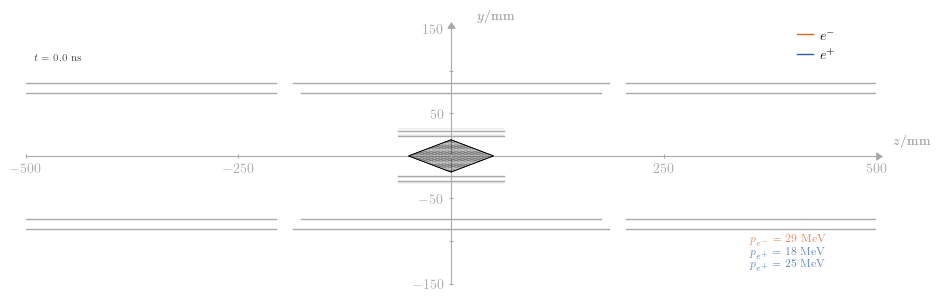

In [109]:
anim1_3e = pt.EventDraw(mu3e2nu, np.argsort(mu3e2nu.n_short_tracks)[-10:][3], draw_momentum=False, animate=True, density=mu5e, plane='zy', tot_time=4e-9)
# anim2 = pt.EventDraw(mu5e, np.argsort(mu5e.n_long_tracks)[6], draw_momentum = False, animate = True, density=mu5e)
# anim3 = pt.EventDraw(mu5e, np.argsort(mu5e.n_long_tracks)[-5:][2], draw_momentum = False, animate = True, density=mu5e)
# anim4 = pt.EventDraw(mu5e, np.argsort(mu5e.n_long_tracks)[-5:][4], draw_momentum = False, animate = True, density=mu5e)

# pt.EventDraw(mu3e2nu, np.argmax(mu3e2nu.n_long_tracks), draw_momentum = False, animate = False, density=mu5e)
# fig, ax = pt.EventDraw(mu5e, np.argsort(mu5e.n_short_tracks)[-6:][5], draw_momentum = False, animate = False, plane='xy',tot_time=1.8e-9)
# fig, ax = pt.EventDraw(mu3e2nu, np.argsort(mu3e2nu.n_long_tracks)[-5:][0], draw_momentum = False, animate = False, plane='zy', tot_time=2e-9)
# pt.EventDraw(mu1e2nu, np.argmax(mu1e2nu.n_long_tracks), draw_momentum = False, animate = False, density=mu5e)
# pt.EventDraw(mu1e2nu, np.argmax(mu1e2nu.n_long_tracks), draw_momentum = False, animate = False, density=mu5e)

# fig.savefig("plots/exmple_new_helix.pdf", bbox_inches = "tight")

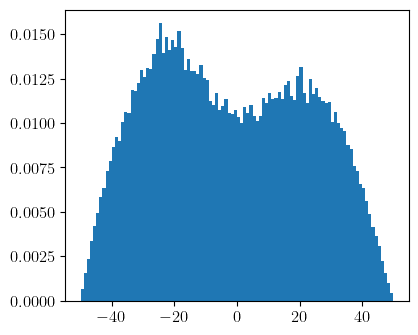

In [137]:
x = np.linspace(-100, 100)
from Mu3e import fastmc

events, w = fastmc.get_decay_positions_in_target(100000)

_ = plt.hist(events[:,2], weights=w, bins = 100)



In [110]:
# anim1.save('plots/animation1_zy.gif', fps=40, dpi=300)
# anim2.save('plots/animation2.gif', fps=40, dpi=300)
# anim3.save('plots/animation3.gif', fps=40, dpi=300)
# anim4.save('plots/animation4.gif', fps=40, dpi=300)
anim1_3e.save('plots/animation1_3e_zy.gif', fps=40, dpi=300)

# Longitudinal view

In [130]:
z_e_plus_0, y_e_plus_0   = pt.draw_helix(mu5e.particles['e+_0'][5]*1e-3, q = 1)
z_e_plus_1, y_e_plus_1   = pt.draw_helix(mu5e.particles['e+_1'][5]*1e-3, q = 1)
z_e_plus_2, y_e_plus_2   = pt.draw_helix(mu5e.particles['e+_2'][5]*1e-3, q = 1)
z_e_minus_1, y_e_minus_1 = pt.draw_helix(mu5e.particles['e-_1'][5]*1e-3, q = -1)
z_e_minus_2, y_e_minus_2 = pt.draw_helix(mu5e.particles['e-_2'][5]*1e-3, q = -1)

fig, ax = plt.subplots(1,1, figsize = (16, 3.5))

pt.XZ_geometry(ax, color='darkgrey', alpha=1)

# Plot the event
electron_color = (0.85, 0.39, 0.14)
positron_color = (0.16, 0.37, 0.65)
ax.plot(z_e_plus_0, y_e_plus_0, lw = 1.0, c = positron_color)
ax.plot(z_e_plus_1, y_e_plus_1, lw = 1.0, c = positron_color)
# ax.plot(z_e_plus_2, y_e_plus_2, lw = 1.0, c = positron_color)
ax.plot(z_e_minus_1, y_e_minus_1, lw = 1.0, c = electron_color)
# ax.plot(z_e_minus_2, y_e_minus_2, lw = 1.0, c = electron_color)

ax.plot([], [], label=r"$e^-$", color=electron_color, lw=1, ls="-")
ax.plot([], [], label=r"$e^+$", color=positron_color, lw=1, ls="-")

ax.set_xlim(-800, 800)
ax.set_ylim(-150, 150)

# Styling
ax_colors = "#CFCFCF"
ax.spines[["left", "bottom"]].set_position("center")
ax.spines[["left", "bottom"]].set_edgecolor(ax_colors)
ax.spines[["left", "bottom"]].set_zorder(-1)
ax.spines[["top", "right"]].set_visible(False)

ax.set_xticks([-800, -600, -400, -200, 200, 400, 600, 800])
ax.set_yticks([-150, -100, -50, 50, 100, 150])

ax.set_xticklabels(
        [r'$-800$', "", r'$-400$', "", "", r'$400$', "", r'$800$'], fontsize=10, color=ax_colors, zorder=-1
    )
ax.set_yticklabels(
        [r'$-150$', "", r'$-50$', r'$50$', "", r'$150$'], fontsize=10, color=ax_colors, zorder=-1
    )
ax.tick_params(axis="x", colors=ax_colors, direction="inout", length=3, zorder=-1)
ax.tick_params(axis="y", colors=ax_colors, direction="inout", length=3, zorder=-1)

ax.scatter(
        0,
        ax.get_ylim()[1],
        marker=10,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )
ax.scatter(
        ax.get_xlim()[1],
        0,
        marker=9,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )

ax.text(
        1.02,
        0.53,
        r"$z\mathrm{/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )
ax.text(
        0.53,
        1.02,
        r"$y\mathrm{/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )


target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]

ax.legend(frameon = False)


ax.add_patch(
    plt.Polygon(target_coordinates, color ='black',
                alpha = 0.2)
    )

fig.tight_layout()
fig.savefig(r'plots/longitudinal_event_display.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')

AttributeError: module 'Mu3e.plot_tools' has no attribute 'draw_helix'